## Download and Unzip Dataset
Tempat untuk mengunduh dan mengekstrak dataset yang akan digunakan.

Nama Anggota Kelompok :
Adam Haidar Azizi            (5025211114), 
Ihsan WIdagdo                (5025211231),
Javier Nararya Aqsa Setiyono (5025211245)


In [1]:
import os

# Define the dataset filename
dataset_filename = 'adult-income-dataset.zip'

# Check if the dataset file already exists
if not os.path.exists(dataset_filename):
    # Download the dataset
    print("Downloading dataset...")
    !kaggle datasets download -d wenruliu/adult-income-dataset
    
    # Unzip the dataset
    print("Unzipping dataset...")
    !unzip -o {dataset_filename}  # '-o' option to overwrite existing files
else:
    print("Dataset already exists. Skipping download and unzip.")


Dataset already exists. Skipping download and unzip.


## Import Common Libraries for Datamining
Mengimpor pustaka yang diperlukan untuk analisis data, seperti Pandas, Numpy, Matplotlib, dan sebagainya.

In [2]:
# Code for Import Common Libraries for Datamining
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from numpy import nan

## Load Dataset
Memuat dataset ke dalam DataFrame untuk memulai proses analisis.

In [3]:
# Code for Load Dataset
df=pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Get Dataset Info
Melihat informasi dasar dari dataset, termasuk jumlah baris, kolom, dan tipe data dari setiap kolom.

In [4]:
# Code for Get Dataset Info
df.shape

(48842, 15)

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Change Object Dtype to Categorical dan Pengecekan Unique Values
Mengubah tipe data dari kolom yang berjenis object menjadi categorical, jika diperlukan.

In [9]:
# Code for Change Object Dtype to Categorical
# Identify categorical columns to convert
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race',  'native-country', 'income']

# Convert object columns to categorical
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check the data types to confirm conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
dtype: object


In [10]:
print('workclass',df.workclass.unique())
print('education',df.education.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.gender.unique())
print('native-country',df['native-country'].unique())

workclass ['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
education ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital-status ['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation ['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?', 'Other-service', ..., 'Sales', 'Priv-house-serv', 'Transport-moving', 'Handlers-cleaners', 'Armed-Forces']

Kelompokin Kebangsaan Selain USA jadi Others Karena Target Analisisnya di Dalam US

In [11]:
df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x != 'United-States' else x)

# Check the result
print(df['native-country'].value_counts())

native-country
United-States    43832
Other             5010
Name: count, dtype: int64


## Change '?' to NAN
Mengubah tanda tanya atau simbol lain yang menandakan missing values menjadi NaN untuk penanganan yang lebih mudah.

In [12]:
# Code for Change '?' to NAN
df = df.replace('?',nan)
df.head(10)

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/2320200165.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('?',nan)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Null Data Info
Melihat informasi tentang data yang hilang dari dataset.

In [13]:
# Code for Null Data Info
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
occupation,280900,5.751
workclass,279900,5.731
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000
gender,0,0.000


## Distribution For Each Column
Visualisasi persebaran data menggunakan histogram atau plot lainnya untuk setiap kolom. Ini membantu untuk melihat distribusi data dan mengidentifikasi outliers.

Plotting distribution for categorical column: workclass


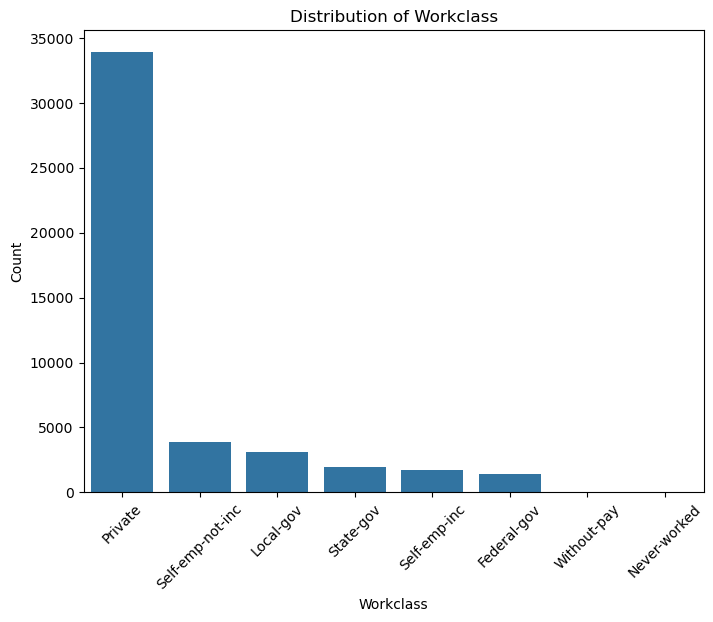

Plotting distribution for categorical column: education


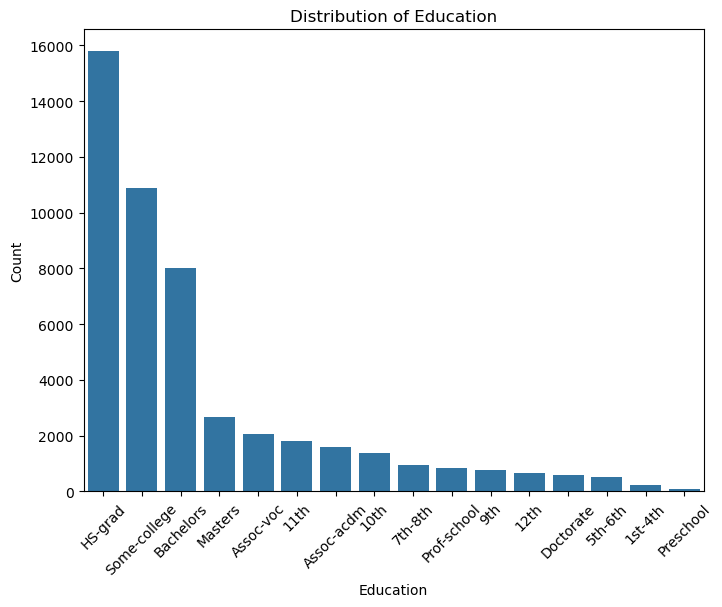

Plotting distribution for categorical column: marital-status


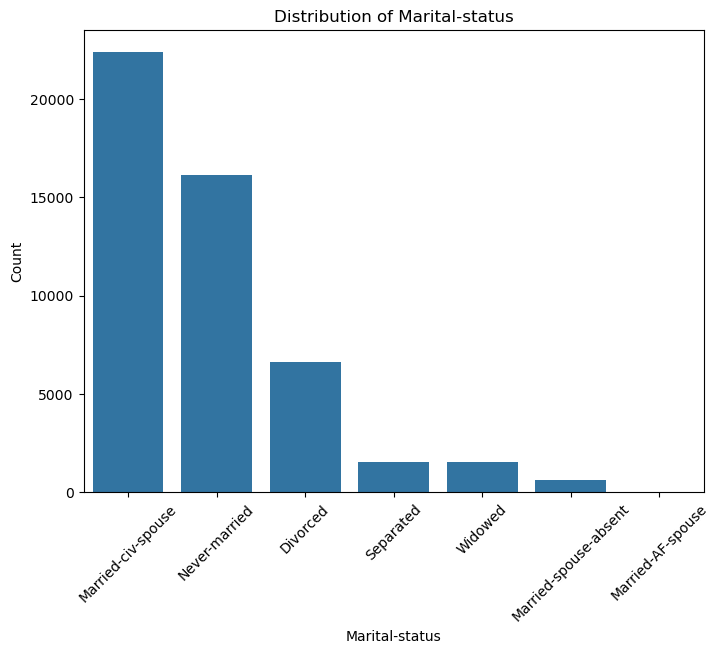

Plotting distribution for categorical column: occupation


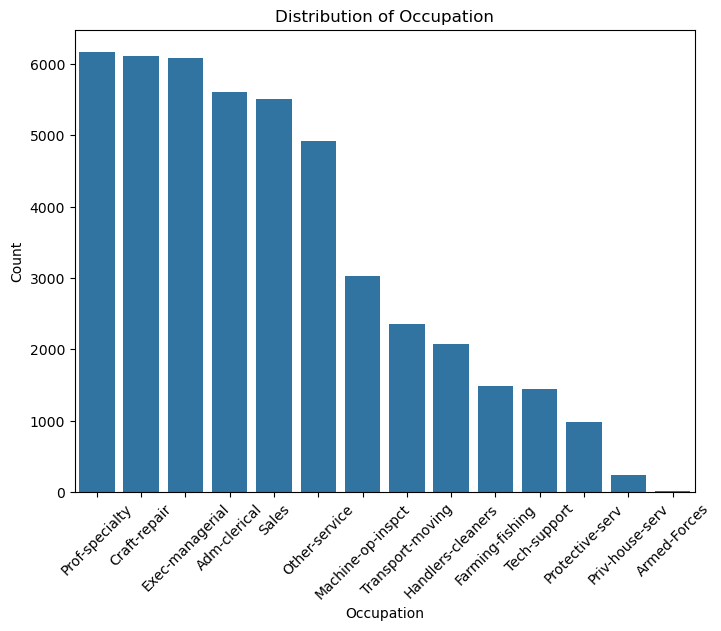

Plotting distribution for categorical column: relationship


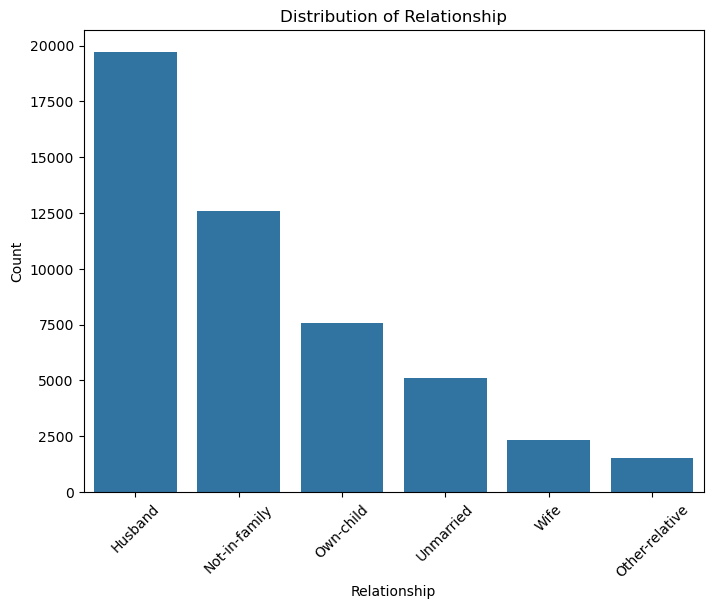

Plotting distribution for categorical column: race


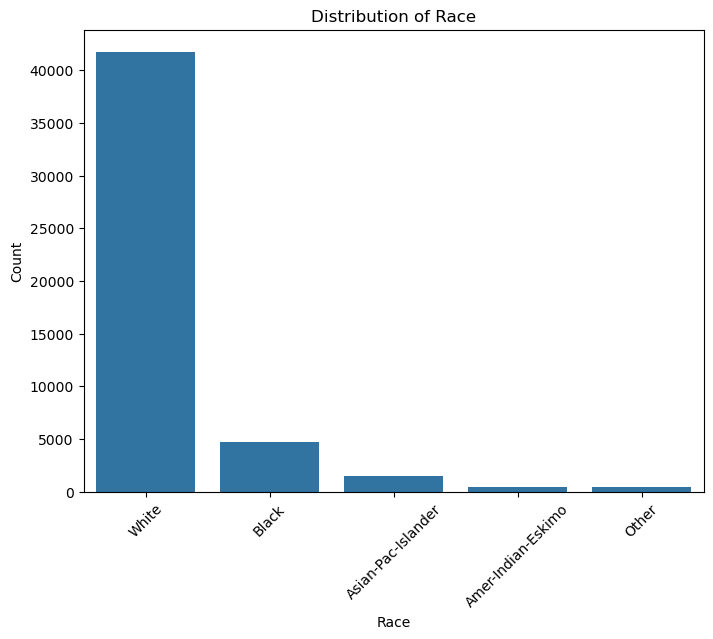

Plotting distribution for categorical column: gender


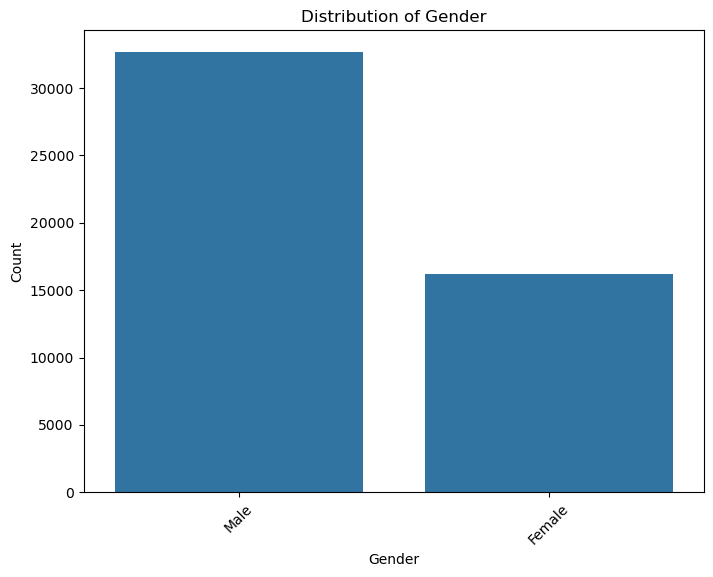

Plotting distribution for categorical column: native-country


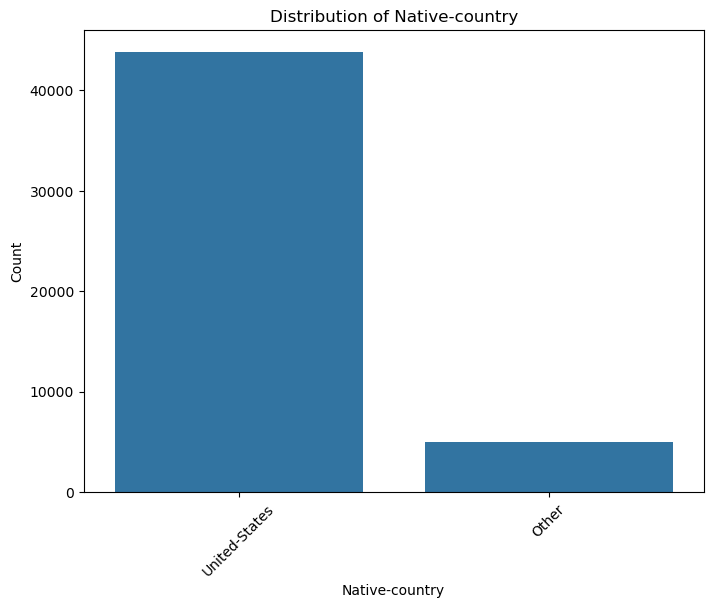

Plotting distribution for categorical column: income


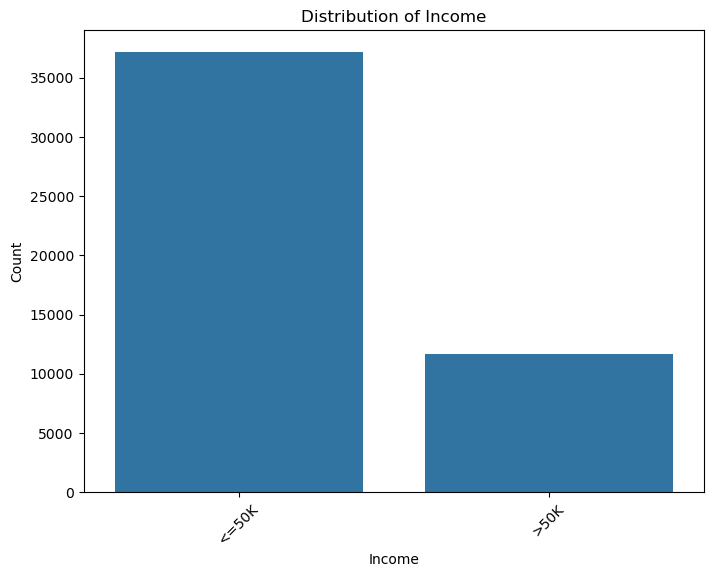

Plotting distribution for numerical column: age


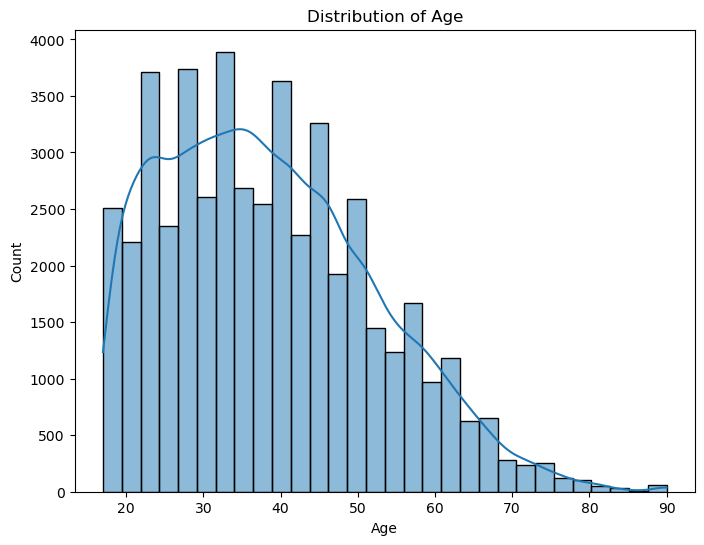

Plotting distribution for numerical column: fnlwgt


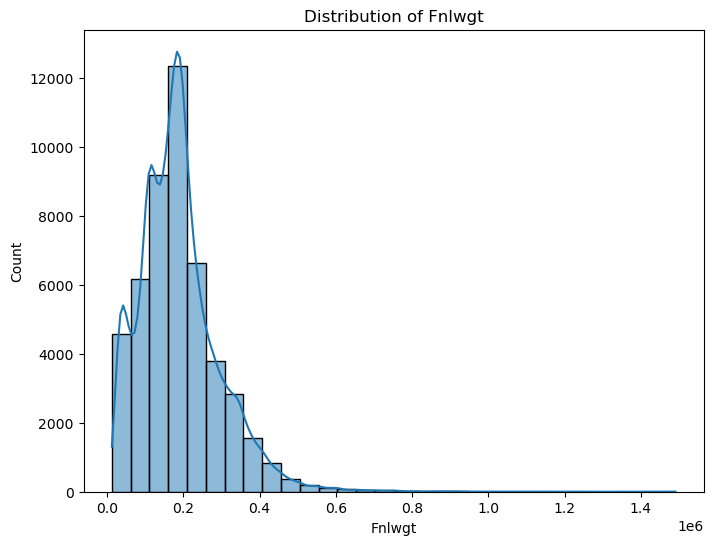

Plotting distribution for numerical column: educational-num


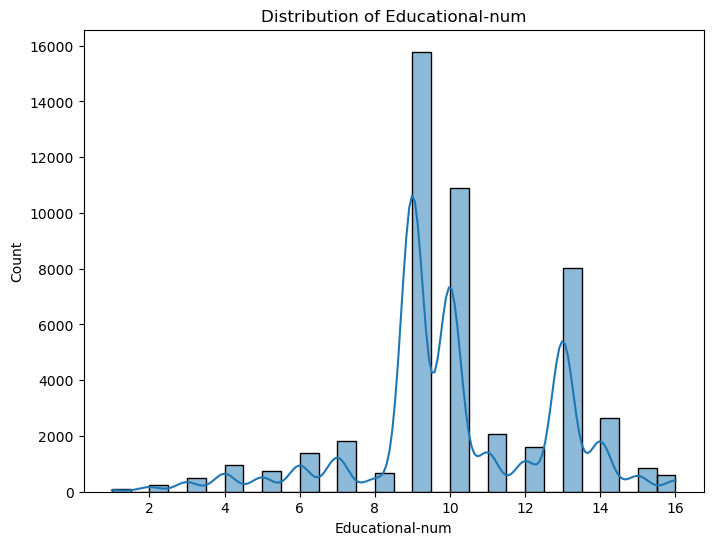

Plotting distribution for numerical column: capital-gain


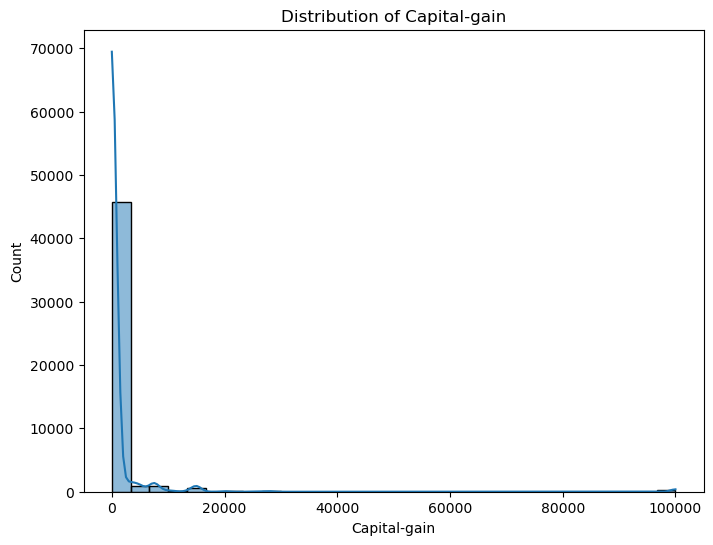

Plotting distribution for numerical column: capital-loss


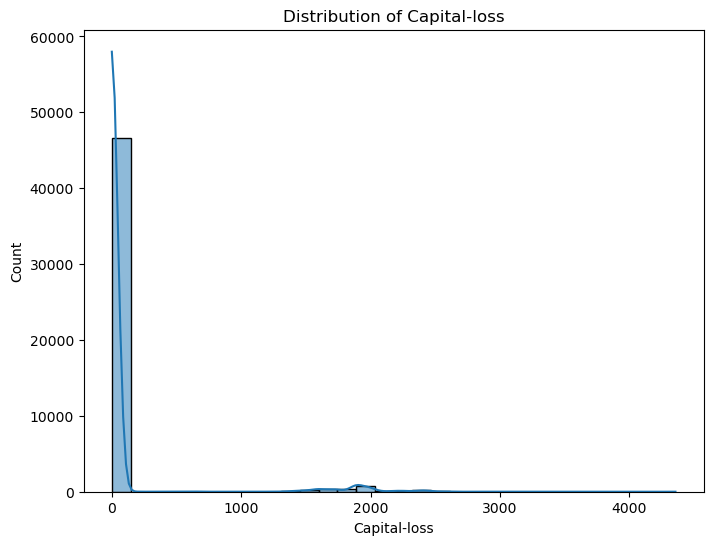

Plotting distribution for numerical column: hours-per-week


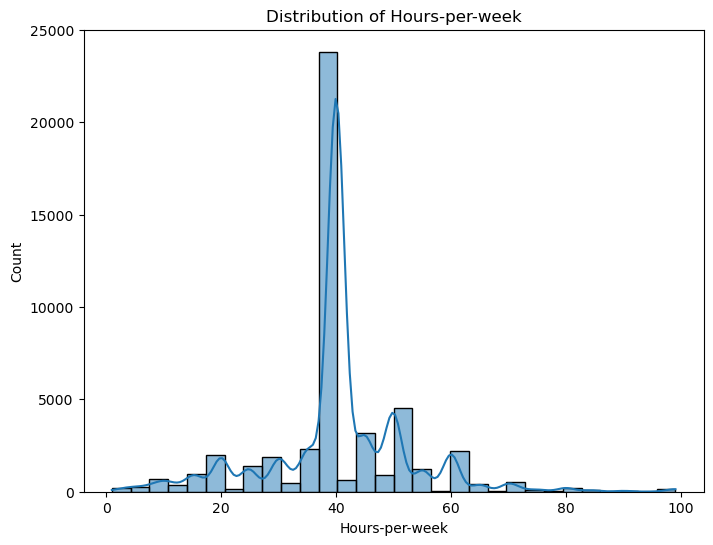

In [14]:
# Code for Distribution For Each Column
# Automatically identify categorical columns (both category and object types)
categorical_columns = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Automatically identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Convert object columns to categorical
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Loop through each categorical column and plot the distribution
for column in categorical_columns:
    print(f"Plotting distribution for categorical column: {column}")  # Debug output
    plt.figure(figsize=(8, 6))
    
    # Calculate and sort the counts for the plot in descending order
    counts = df[column].value_counts().sort_values(ascending=False)
    sns.barplot(x=counts.index, y=counts.values, order=counts.index)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()

# Loop through each numerical column and plot the distribution
for column in numerical_columns:
    print(f"Plotting distribution for numerical column: {column}")  # Debug output
    plt.figure(figsize=(8, 6))
    
    # Plot histogram for numerical columns
    sns.histplot(df[column], bins=30, kde=True)  # Add KDE for smooth distribution
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

### Kesimpulan Distribusi Data

Setelah melakukan visualisasi distribusi untuk kolom kategorikal dan numerik dalam dataset, berikut adalah beberapa poin penting yang dapat disimpulkan:

#### 1. Distribusi Kolom Kategorikal
- Kolom **`workclass`**, **`education`**, **`occupation`**, dan **`relationship`** menunjukkan adanya dominasi beberapa kategori tertentu. Misalnya, kategori "Private" pada kolom `workclass` muncul paling sering, sementara kategori lainnya memiliki jumlah yang jauh lebih sedikit.
- Kolom **`native-country`** didominasi oleh negara **"United States"**, yang jauh lebih tinggi jumlahnya dibanding negara-negara lain.
- Distribusi **`income`** menunjukkan bahwa lebih banyak individu berada dalam kelompok **`<=50K`** dibandingkan **`>50K`**.

#### 2. Distribusi Kolom Numerik
- **`age`** memiliki distribusi yang hampir normal, dengan puncak sekitar usia 30-40 tahun. Namun, ada beberapa individu dengan usia yang lebih tinggi, hingga di atas 80 tahun, yang mungkin perlu dipertimbangkan sebagai outliers.
- **`fnlwgt`** menunjukkan distribusi yang sangat skewed, dengan sebagian besar data terakumulasi pada nilai yang lebih rendah, sementara terdapat beberapa nilai yang sangat tinggi, yang dapat dianggap sebagai outliers.
- **`capital-gain`** dan **`capital-loss`** sebagian besar datanya bernilai 0, dengan sedikit outliers yang memiliki nilai sangat tinggi. Hal ini menunjukkan bahwa hanya sebagian kecil individu yang memiliki keuntungan atau kerugian modal.
- **`hours-per-week`** memiliki distribusi yang lebih terpusat di sekitar angka 40 jam per minggu, yang merupakan jumlah jam kerja standar. Namun, terdapat beberapa individu yang bekerja lebih dari 60 jam per minggu, yang mungkin perlu ditangani sebagai outliers.

#### Rekomendasi Penanganan
- Berdasarkan distribusi di atas, kolom **`fnlwgt`**, **`capital-gain`**, **`capital-loss`**, dan **`hours-per-week`** memiliki outliers yang cukup signifikan dan perlu dilakukan penanganan, baik dengan menggunakan metode **IQR** atau **Capping**.



## Handle Outliers
Menangani outliers yang teridentifikasi dari langkah sebelumnya menggunakan metode seperti Z-score


In [15]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Removing outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Function to handle outliers using capping (1st and 99th percentile)
def handle_outliers_capping(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    # Capping the outliers
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply IQR to columns with extreme outliers
iqr_columns = ['capital-gain', 'capital-loss']  # Columns with extreme outliers
for col in iqr_columns:
    df = handle_outliers_iqr(df, col)

# Apply capping to columns with outliers that should be capped
capping_columns = ['age', 'fnlwgt', 'hours-per-week']  # Columns where outliers should be capped
for col in capping_columns:
    df = handle_outliers_capping(df, col)

# Display the dataset after outlier handling
print(df.head())

   age  workclass    fnlwgt     education  educational-num  \
0   25    Private  226802.0          11th                7   
1   38    Private   89814.0       HS-grad                9   
2   28  Local-gov  336951.0    Assoc-acdm               12   
4   18        NaN  103497.0  Some-college               10   
5   34    Private  198693.0          10th                6   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
4       Never-married                NaN      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0             

### Penjelasan Metode Penanganan Outliers

Dalam dataset ini, kami menggunakan dua metode utama untuk menangani outliers, yaitu **IQR (Interquartile Range)** dan **Capping**, berdasarkan karakteristik data numerik yang dianalisis:

#### 1. IQR (Interquartile Range) Method
- **Cocok untuk data yang tidak berdistribusi normal atau memiliki skewness**. IQR membagi data berdasarkan kuartil dan menghitung rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Nilai di luar rentang 1.5 * IQR dianggap sebagai outliers.
- **Menghilangkan outliers ekstrem** yang sering kali terjadi pada data numerik seperti `capital-gain` dan `capital-loss`. Kedua kolom ini memiliki banyak nilai 0 dengan beberapa nilai yang sangat tinggi. Oleh karena itu, IQR efektif untuk menghilangkan nilai-nilai yang jauh dari distribusi umum data.
- **Bermanfaat untuk data seperti `age`, `fnlwgt`, dan `hours-per-week`** yang memiliki rentang nilai yang luas. Namun, outliers yang terlalu ekstrem harus dihapus jika nilainya tidak relevan secara konteks.

#### 2. Capping Method
- **Capping lebih cocok jika tujuan utamanya adalah mempertahankan semua data namun mengurangi dampak outliers**. Dalam situasi di mana outliers tidak salah secara konsep tetapi sangat mempengaruhi hasil analisis statistik atau model machine learning, Capping membatasi outliers ke dalam rentang persentil tertentu.
- **Membatasi nilai ekstrem tanpa menghapus data** sangat penting, terutama untuk kolom seperti `fnlwgt` yang memiliki nilai sangat besar. Dengan Capping, pengaruh outliers besar dapat dikurangi tanpa menghilangkan data sepenuhnya.
- **Ideal untuk `hours-per-week` dan `capital-gain/loss`** yang mungkin memiliki pekerja dengan jam kerja sangat tinggi atau individu dengan keuntungan modal yang ekstrem. Dalam hal ini, Capping memungkinkan data tetap relevan sambil menjaga kestabilan analisis.

#### Mengapa Kedua Metode Ini Dipilih?
- **Flexibilitas**: Kedua metode memberikan fleksibilitas dalam menangani outliers tergantung pada karakteristik masing-masing kolom. IQR efektif untuk memotong outliers yang ekstrem, sementara Capping digunakan untuk membatasi outliers pada data yang mungkin masih masuk akal secara konteks.
- **Penanganan Outliers yang Tidak Terlalu Agresif**: Dengan menggunakan metode ini, kami tidak kehilangan data penting. Hal ini sangat penting terutama pada dataset di mana outliers mungkin tetap relevan dalam konteks prediksi, seperti jam kerja atau usia seseorang.


## Simplify Some Column Options
Simplifikasi status pernikahan dan education


In [16]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/2705722374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/2705722374.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories i

In [17]:
df['education'].replace('Preschool', 'DO',inplace=True)
df['education'].replace('10th', 'DO',inplace=True)
df['education'].replace('11th', 'DO',inplace=True)
df['education'].replace('12th', 'DO',inplace=True)
df['education'].replace('1st-4th', 'DO',inplace=True)
df['education'].replace('5th-6th', 'DO',inplace=True)
df['education'].replace('7th-8th', 'DO',inplace=True)
df['education'].replace('9th', 'DO',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/3011118621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].replace('Preschool', 'DO',inplace=True)
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/3011118621.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['edu

## Correlation Analysis
Analisis korelasi antar fitur untuk seleksi fitur. Menggunakan heatmap atau metode lain untuk visualisasi korelasi.

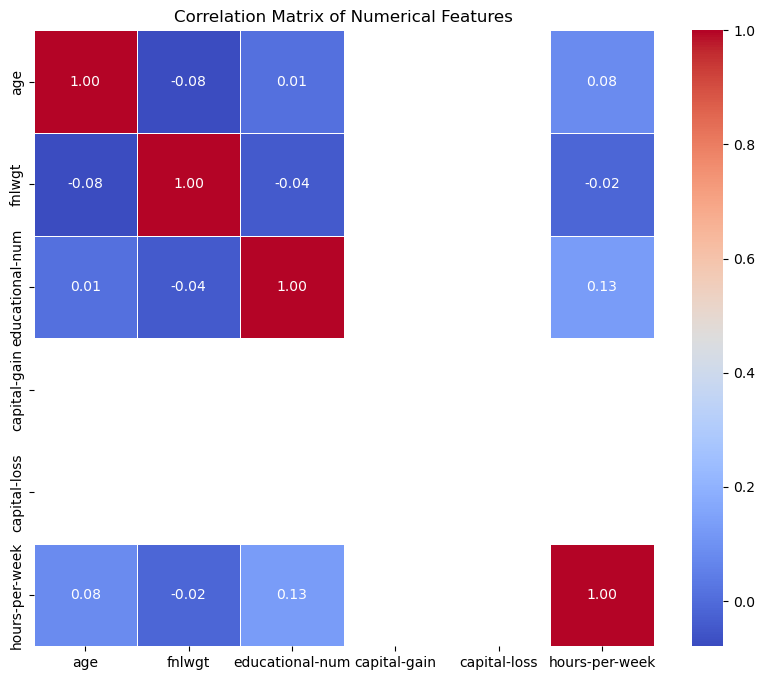

                      age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.079345         0.010891           NaN   
fnlwgt          -0.079345  1.000000        -0.043888           NaN   
educational-num  0.010891 -0.043888         1.000000           NaN   
capital-gain          NaN       NaN              NaN           NaN   
capital-loss          NaN       NaN              NaN           NaN   
hours-per-week   0.082757 -0.015149         0.129901           NaN   

                 capital-loss  hours-per-week  
age                       NaN        0.082757  
fnlwgt                    NaN       -0.015149  
educational-num           NaN        0.129901  
capital-gain              NaN             NaN  
capital-loss              NaN             NaN  
hours-per-week            NaN        1.000000  


In [18]:

# Step 1: Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Step 3: Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Optional: Print the correlation matrix to inspect the values
print(correlation_matrix)

### Kesimpulan Analisis Korelasi

Berdasarkan **Correlation Matrix** yang dihasilkan, berikut adalah beberapa poin penting yang dapat disimpulkan:

#### 1. Korelasi Lemah Antar Fitur
- Sebagian besar fitur numerik dalam dataset ini memiliki korelasi yang lemah satu sama lain. Nilai korelasi mendekati 0 menunjukkan bahwa tidak ada hubungan linear yang kuat antara fitur-fitur seperti `age`, `fnlwgt`, `educational-num`, dan `hours-per-week`.
- Korelasi tertinggi ditemukan antara `educational-num` dan `hours-per-week` sebesar **0.13**, yang masih tergolong rendah dan menunjukkan sedikit kecenderungan bahwa individu dengan tingkat pendidikan lebih tinggi mungkin memiliki jam kerja yang sedikit lebih banyak.

#### 2. Fitur `capital-gain` dan `capital-loss`
- Terdapat nilai **NaN** pada kolom `capital-gain` dan `capital-loss`. Ini mungkin disebabkan oleh distribusi nilai yang sangat tidak merata, di mana sebagian besar data bernilai 0, sehingga tidak memungkinkan untuk perhitungan korelasi.
- Perlu dilakukan observasi lebih lanjut terhadap kedua fitur ini, seperti melakukan transformasi data atau penanganan nilai-nilai ekstrem.

#### 3. Korelasi Fitur `hours-per-week`
- Fitur ini memiliki korelasi positif yang sangat kecil dengan `age` (**0.08**) dan `educational-num` (**0.13**). Hal ini menunjukkan bahwa jam kerja tidak memiliki hubungan linear yang signifikan dengan usia atau tingkat pendidikan, meskipun ada sedikit kecenderungan bahwa semakin tinggi tingkat pendidikan, jam kerja per minggu cenderung sedikit meningkat.


## Impute Null Values Using XGBoost
Mengimputasi nilai yang hilang menggunakan model XGBoost atau teknik imputasi lain yang sesuai dengan nature data.

In [19]:
# Code for Impute Null Values Using XGBoost
import xgboost as xgb
import pandas as pd

# Function to fill missing values using XGBoost
def fill_missing_with_xgboost_native(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column].cat.codes  # Encode labels with integers

    # One-hot encode features
    X = pd.get_dummies(X, drop_first=True)
    X.fillna(-999, inplace=True)  # Placeholder for NaNs in features

    train_mask = y >= 0  # Only train on rows where target is not missing
    predict_mask = y < 0  # Predict where target is missing (-1)
    
    X_train = X[train_mask]
    y_train = y[train_mask]
    X_predict = X[predict_mask]

    if X_train.empty:
        print(f"Not enough data to train the model for {target_column}. Skipping...")
        return

    try:
        num_classes = df[target_column].nunique()
        model = xgb.XGBClassifier(objective='multi:softprob', num_class=num_classes,
                                  eval_metric='mlogloss')
        model.fit(X_train, y_train)

        # Predict missing values
        y_predict = model.predict(X_predict)
        # Map predicted integers back to original categories
        category_map = dict(enumerate(df[target_column].cat.categories))
        predicted_categories = [category_map.get(p) for p in y_predict]

        # Convert target column to a writable format
        df[target_column] = df[target_column].astype('category')
        
        # Safe assignment back to DataFrame
        df.loc[predict_mask, target_column] = predicted_categories

    except Exception as e:
        print(f"An error occurred while training the model for {target_column}: {str(e)}")

# Step 1: Check missing values before imputing
print("Missing values before imputing:")
null_values_before = df.isnull().sum()
print(null_values_before)

# Step 2: Apply the imputation process
for col in ['workclass', 'occupation']:
    fill_missing_with_xgboost_native(df, col)

# Step 3: Check missing values after imputing
print("\nMissing values after imputing:")
null_values_after = df.isnull().sum()
print(null_values_after)

# Optional: Display before and after in a single DataFrame for comparison
comparison = pd.DataFrame({
    'Missing Before': null_values_before,
    'Missing After': null_values_after
})
comparison['Difference'] = comparison['Missing Before'] - comparison['Missing After']
print("\nComparison of missing values before and after:")
print(comparison)


Missing values before imputing:
age                   0
workclass          2524
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2534
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

Missing values after imputing:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Comparison of missing values before and after:
                 Missing Before  Missing After  Difference
age                           0              0           0
workclass                  2524              0        2524
fnlwgt    

## One Hot Encoding
Mengencode data kategorikal menjadi numerik menggunakan One Hot Encoding atau teknik encoding lain yang sesuai.

In [20]:
# Code for One Hot Encoding
# Dropping the target column 'income' from features
X = df.drop(columns=['income']) 
y = df['income']  # Target

# Apply One-Hot Encoding for all categorical features, keeping all categories
X_encoded = pd.get_dummies(X, drop_first=False)

# Combine the encoded features with the target variable
df = pd.concat([X_encoded, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the encoded DataFrame
print(df.head())

    age    fnlwgt  educational-num  capital-gain  capital-loss  \
0  25.0  226802.0              7.0           0.0           0.0   
1  38.0   89814.0              9.0           0.0           0.0   
2  28.0  336951.0             12.0           0.0           0.0   
4  18.0  103497.0             10.0           0.0           0.0   
5  34.0  198693.0              6.0           0.0           0.0   

   hours-per-week workclass_Federal-gov workclass_Local-gov  \
0            40.0                 False               False   
1            50.0                 False               False   
2            40.0                 False                True   
4            30.0                 False               False   
5            30.0                 False               False   

  workclass_Never-worked workclass_Private  ... race_Amer-Indian-Eskimo  \
0                  False              True  ...                   False   
1                  False              True  ...                   False   

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48008 entries, 0 to 42504
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           42525 non-null  float64 
 1   fnlwgt                        42525 non-null  float64 
 2   educational-num               42525 non-null  float64 
 3   capital-gain                  42525 non-null  float64 
 4   capital-loss                  42525 non-null  float64 
 5   hours-per-week                42525 non-null  float64 
 6   workclass_Federal-gov         42525 non-null  object  
 7   workclass_Local-gov           42525 non-null  object  
 8   workclass_Never-worked        42525 non-null  object  
 9   workclass_Private             42525 non-null  object  
 10  workclass_Self-emp-inc        42525 non-null  object  
 11  workclass_Self-emp-not-inc    42525 non-null  object  
 12  workclass_State-gov           42525 non-null  objec

## Normalization/Standardization
Normalisasi atau standardisasi nilai data untuk membawa semua fitur ke skala yang sama, penting untuk model machine learning.

In [22]:
# Code for Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric features using Min-Max Scaler
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Check Duplicate and Drop Duplicate
Memeriksa dan menghapus duplikat untuk menghindari redundansi data.

In [23]:
# Code for Check Duplicate and Drop Duplicate
# Find initial duplicates
duplicates_initial = df[df.duplicated()]
duplicate_count_initial = df.duplicated().sum()
print(f"Initial number of duplicate rows: {duplicate_count_initial}")

# Drop all duplicates
df_cleaned = df.drop_duplicates(keep=False)

# Optional: Reset index of the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

# Check for duplicates again in the cleaned DataFrame
duplicates_after_cleaning = df_cleaned[df_cleaned.duplicated()]
duplicate_count_after_cleaning = df_cleaned.duplicated().sum()

# Print the results
print(f"Number of duplicate rows after cleaning: {duplicate_count_after_cleaning}")

Initial number of duplicate rows: 5521
Number of duplicate rows after cleaning: 0


## Each Columns vs Income

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

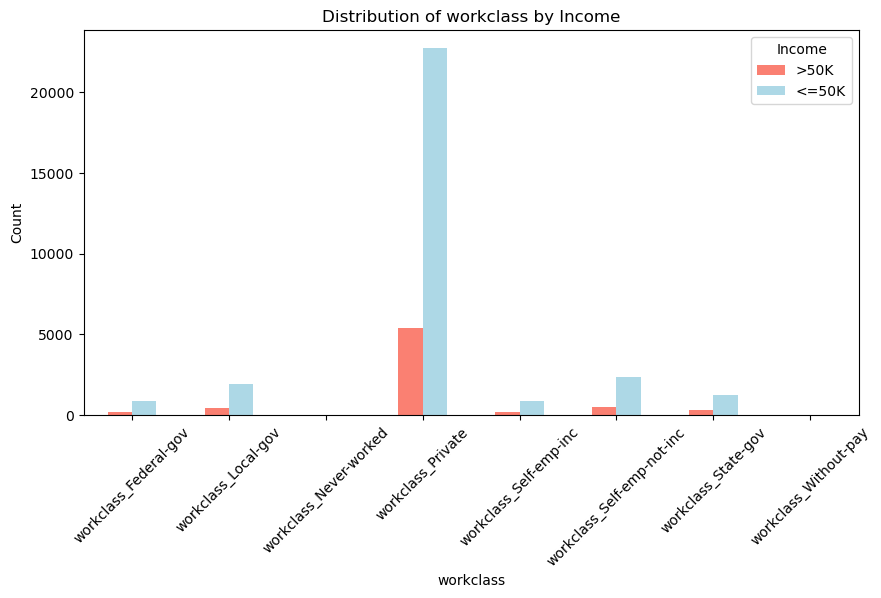

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

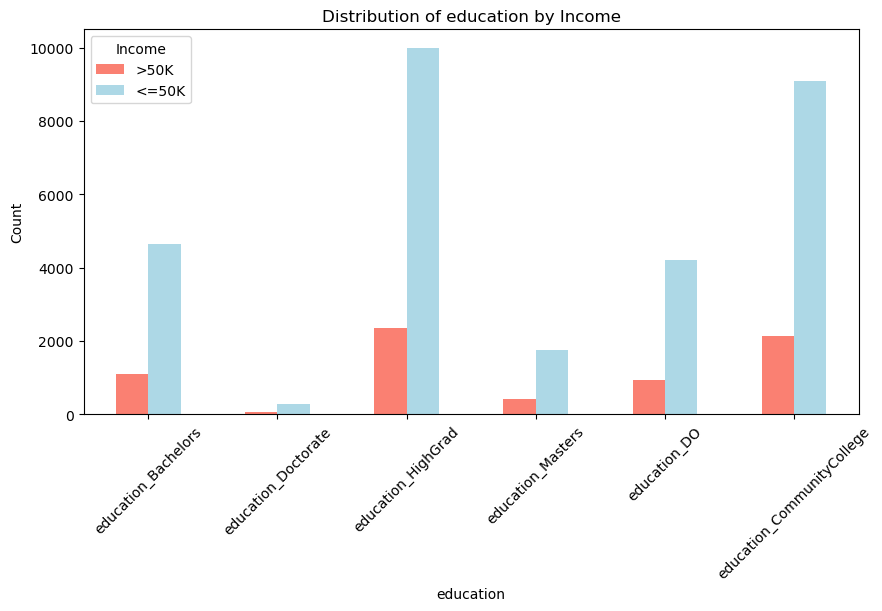

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

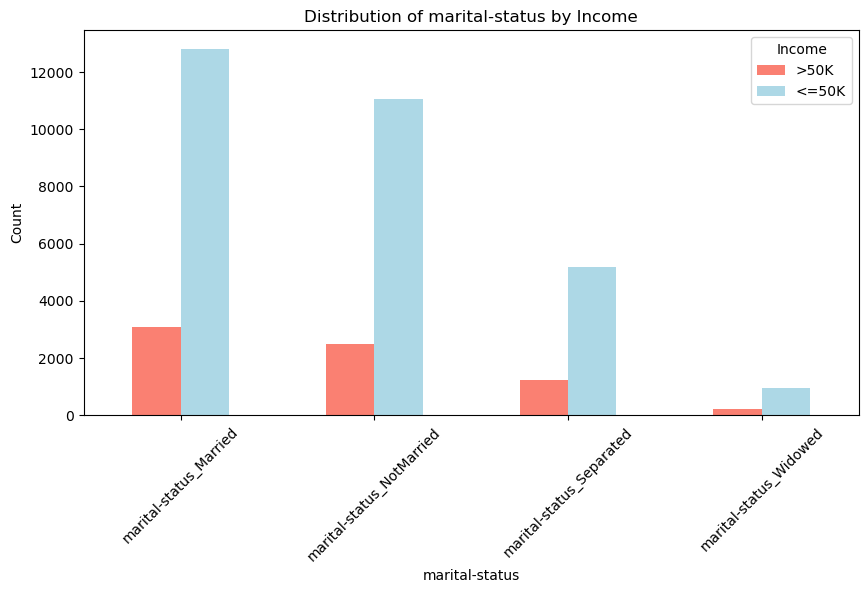

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

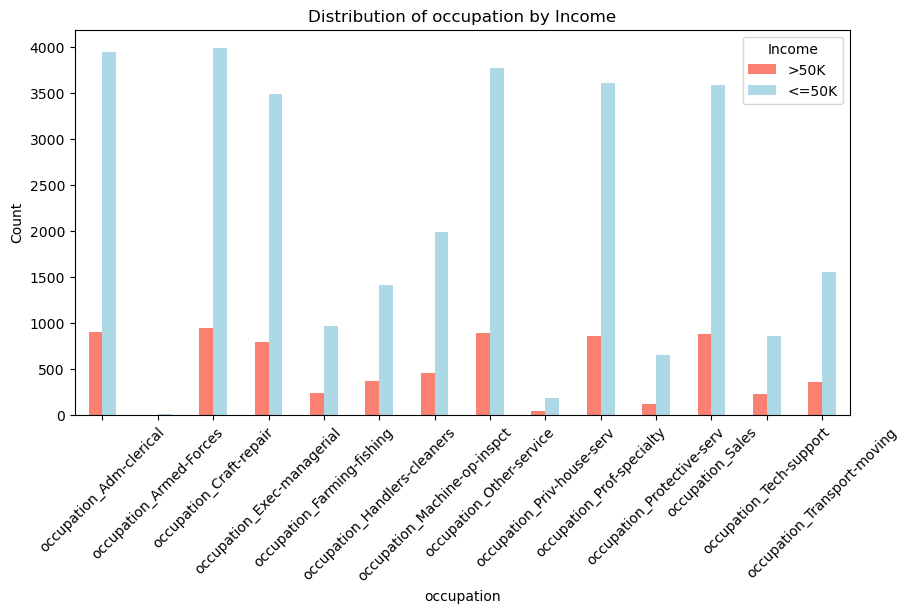

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

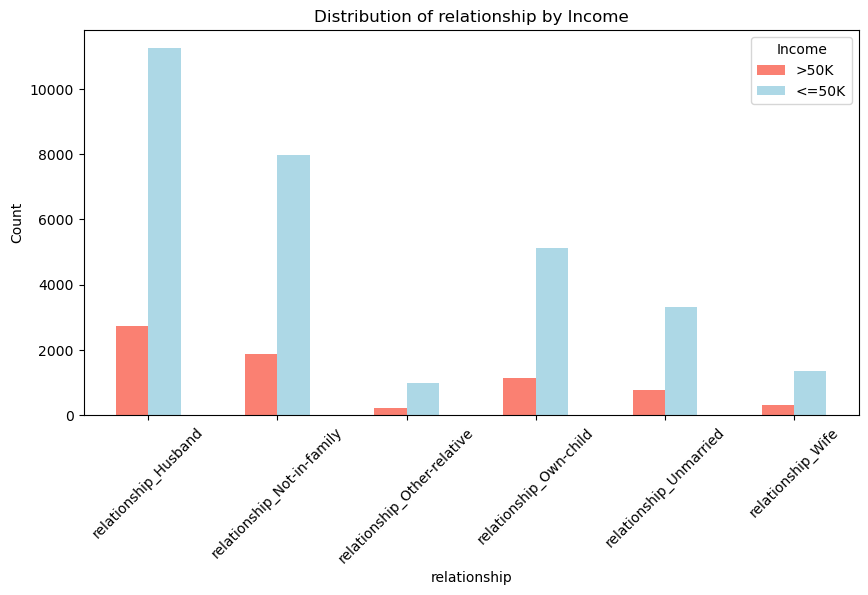

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

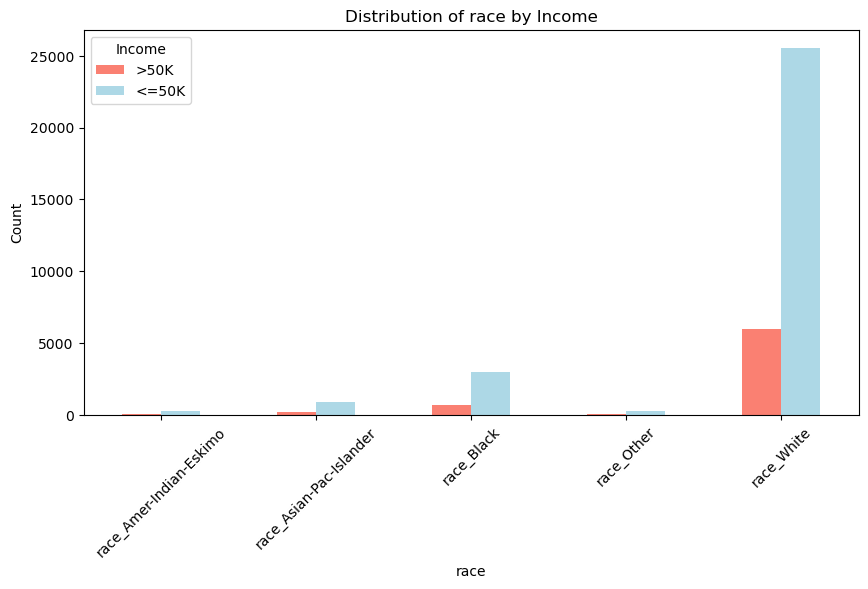

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()


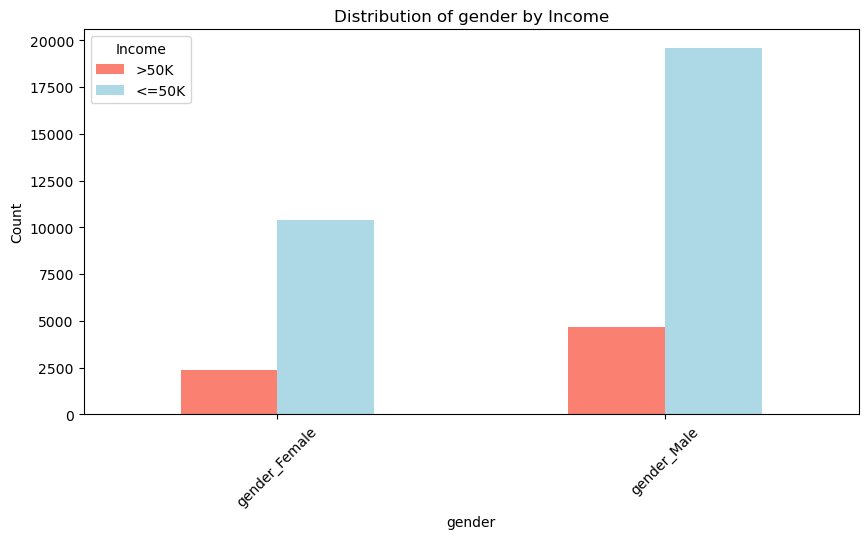

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()
/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/625797007.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts[col] = df.groupby('income')[col].sum()


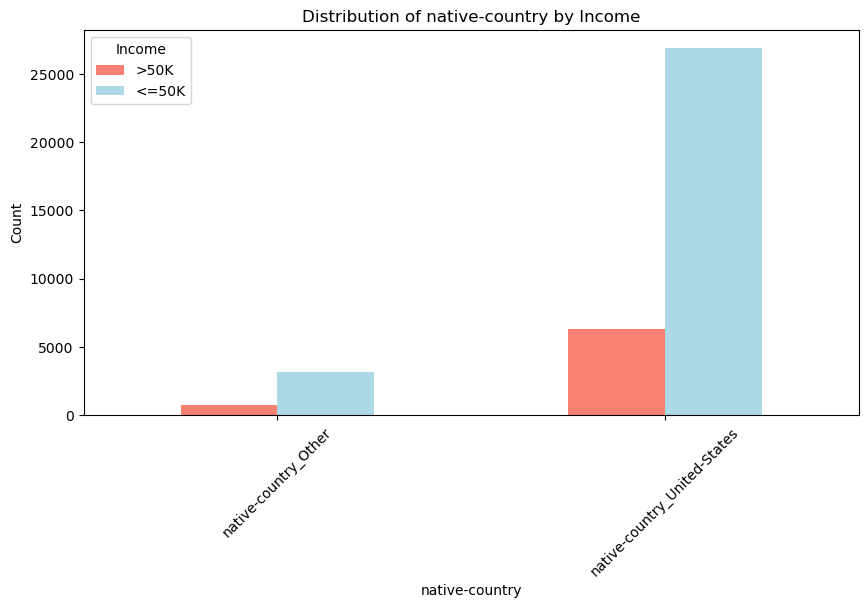

In [25]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'gender', 'native-country']

# Ensure the DataFrame contains the necessary columns
for feature in categorical_features:
    # Check if the original feature has been one-hot encoded
    cols = [col for col in df.columns if col.startswith(feature + '_')]
    
    if cols:  # Proceed only if the feature has one-hot encoded columns
        # Create an empty DataFrame to store the counts
        counts = pd.DataFrame(index=[">50K", "<=50K"])

        # Count for each category and income level
        for col in cols:
            counts[col] = df.groupby('income')[col].sum()

        # Modify index to remove 'feature_' prefix for better readability
        counts.index = counts.index.str.replace('<=50K', '<=50K').str.replace('>50K', '>50K')

        # Create a bar plot with different colors for each income category
        plt.figure(figsize=(10, 5))
        counts.T.plot(kind='bar', color=["salmon", "lightblue"], ax=plt.gca())
        plt.title(f"Distribution of {feature} by Income")
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Income')
        plt.show()
    else:
        print(f"No one-hot encoded columns found for {feature}.")

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/1417783618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=df, palette={"<=50K": "lightblue", ">50K": "salmon"})


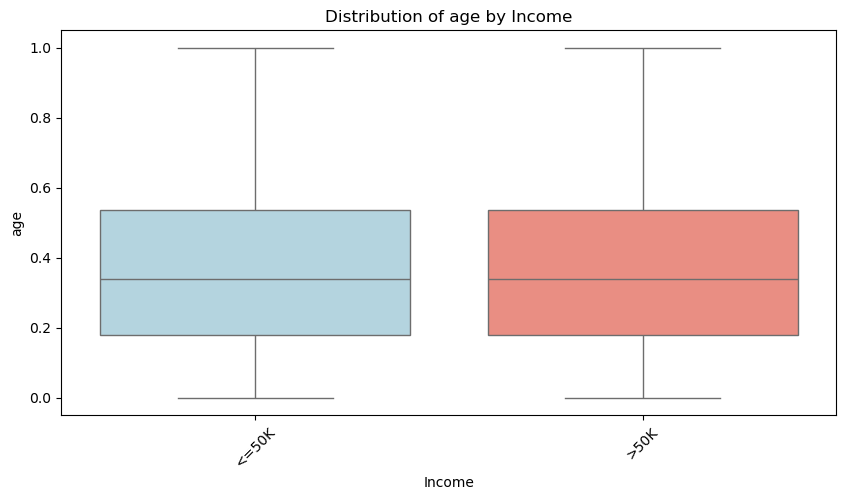

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/1417783618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=df, palette={"<=50K": "lightblue", ">50K": "salmon"})


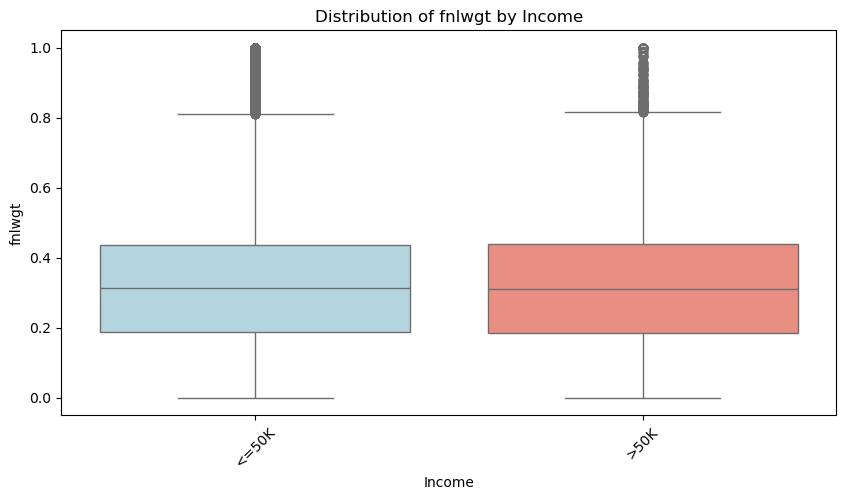

/var/folders/m7/xk20sqzn4h7_j8kcshdrfk2h0000gn/T/ipykernel_3653/1417783618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=feature, data=df, palette={"<=50K": "lightblue", ">50K": "salmon"})


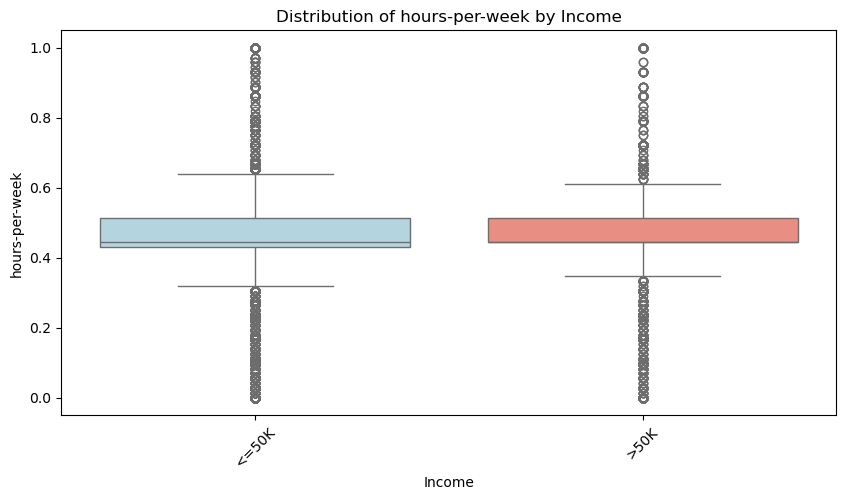

In [27]:
numerical_features = ['age', 'fnlwgt',  'hours-per-week']

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='income', y=feature, data=df, palette={"<=50K": "lightblue", ">50K": "salmon"})
    plt.title(f'Distribution of {feature} by Income')
    plt.xlabel('Income')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()


# Kesimpulan Keseluruhan dari Grafik

### 1. Distribusi Fitur Kategorikal
Beberapa kategori seperti "Private" dalam fitur workclass dan "HS-grad" dalam fitur education adalah yang paling dominan. 
Hal ini menunjukkan bahwa dataset mungkin lebih terpengaruh oleh kategori-kategori yang lebih umum dan ini harus diperhatikan dalam analisis lebih lanjut.

### 2. Distribusi Fitur Numerik
Distribusi numerik menunjukkan bahwa usia kebanyakan individu berada dalam rentang usia produktif, dan sebagian besar orang bekerja selama 40 jam per minggu. 
Ini menunjukkan bahwa dataset ini memiliki representasi yang baik dari populasi pekerja penuh waktu.

### 3. Heatmap Korelasi
Korelasi antara fitur numerik menunjukkan bahwa sebagian besar fitur memiliki korelasi rendah satu sama lain, yang berarti bahwa mereka memberikan informasi yang relatif independen. 
Ini mengindikasikan bahwa setiap fitur dapat memberikan kontribusi yang unik dalam model prediktif.

### 4. Grafik Batang untuk Fitur Kategorikal Berdasarkan Pendapatan
Grafik ini menunjukkan bahwa kategori tertentu seperti tingkat pendidikan yang lebih tinggi dan pekerjaan tertentu memiliki korelasi positif dengan pendapatan >50K. 
Sebaliknya, kategori seperti pendidikan yang lebih rendah dan pekerjaan dengan keterampilan rendah lebih sering berkaitan dengan pendapatan ≤50K.

### 5. Box Plot untuk Fitur Numerik Berdasarkan Pendapatan
Box plot menunjukkan bahwa individu yang lebih tua dan mereka yang bekerja lebih banyak jam per minggu cenderung memiliki pendapatan >50K. 
Ini menyoroti bahwa pengalaman dan jumlah jam kerja adalah faktor penting yang mempengaruhi pendapatan.
